In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from time import time

In [23]:
class oi_2d(object):
    #---xo,yo: observation points
    #---xg,yg: grid points
    #---R: raidus
    #---B_std: back ground standard deviation
    #---fo: observation value at observation points
    #---ft: true value at grid points
    #---o_std: observation standard deviation
    def __init__(self,xo,xg,yo,yg,R,B_std):
        self.xo = xo
        self.xg = xg
        self.yo = yo
        self.yg = yg
        self.R = R
        self.B_std = B_std
        # Construct background error covariance matricies
        self.Bi = np.exp(-((self.xg[:,:,np.newaxis,np.newaxis]-self.xo[np.newaxis,np.newaxis,:,:])**2\
                         +(yg[:,:,np.newaxis,np.newaxis]-yo[np.newaxis,np.newaxis,:,:])**2)/self.R**2)*self.B_std**2
        self.B = np.exp(-((self.xo[:,:,np.newaxis,np.newaxis]-self.xo[np.newaxis,np.newaxis,:,:])**2\
                         +(yo[:,:,np.newaxis,np.newaxis]-yo[np.newaxis,np.newaxis,:,:])**2)/self.R**2)*self.B_std**2
    
    
    def interpolate(self,fo,ft,o_std):
        self.fo = fo
        self.ft = ft
        self.o_std = o_std
        self.N = fo.shape
        self.Ng = ft.shape
        #  Construct observational error covariance matrix (diagonal)
        self.O = self.o_std**2*np.eye(self.N[1]*self.N[0],self.N[1]*self.N[0])
        self.Bi = self.Bi.reshape(self.Ng[1]*self.Ng[0],self.N[1]*self.N[0])
        self.B = self.B.reshape(self.N[1]*self.N[0],self.N[1]*self.N[0])
        #  Weights, analysis and analysis error
        self.W = np.dot(self.Bi, np.linalg.inv(self.O + self.B))
        fo_r = self.fo.reshape(self.N[1]*self.N[0])
        fA = np.dot(self.W,fo_r)
        fA = fA.reshape(self.Ng[0],self.Ng[1])
        EA = self.B_std**2-np.diag(np.dot(self.W, self.Bi.T))
        EA = EA.reshape(self.Ng[0],self.Ng[1]) 
        return fA, EA


In [45]:
obs_std = 0.1
back_std = np.sqrt(0.5) 
back_radius = 0.2
Nx_obs = 50
Ny_obs = 60

In [46]:
def truth(x,y):
    return np.sin(x*2*np.pi)*np.cos(y*2*np.pi)
#---Observation points and data
x_obs = np.random.rand(Nx_obs)
y_obs = np.random.rand(Ny_obs)
x_obs.sort()
y_obs.sort()
xx_obs,yy_obs = np.meshgrid(x_obs,y_obs)
f_obs = truth(xx_obs,yy_obs)+obs_std*np.random.randn(Ny_obs,Nx_obs)


In [47]:
#---Grid points and data
x_grid = np.linspace(0,1,101)
y_grid = np.linspace(0,1,101)
xx_grid,yy_grid = np.meshgrid(x_grid,y_grid)
f_truth = truth(xx_grid,yy_grid)

In [48]:
#---Optimal interpolation
t_start = time()
twoD = oi_2d(xx_obs, xx_grid,yy_obs,yy_grid, back_radius, back_std)
A, Ea = twoD.interpolate(f_obs, f_truth,obs_std)
print('Calculated in %7.3f seconds' % (time()-t_start))

Calculated in  20.870 seconds


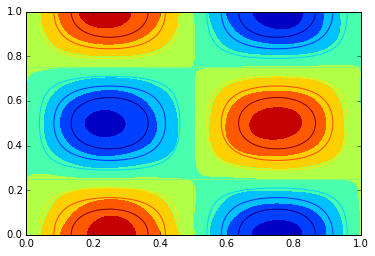

In [49]:
#---plot truth field and analysis field 
plt.contourf(x_grid,y_grid,A)
plt.contour(x_grid,y_grid,f_truth)

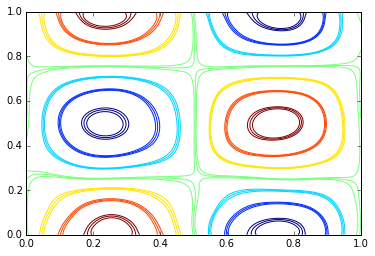

In [50]:
#---plot analysis field and error
plt.contour(x_grid,y_grid,A+np.sqrt(Ea))
plt.contour(x_grid,y_grid,A-np.sqrt(Ea))
plt.contour(x_grid,y_grid,A)